# Laboratorio 5

## Task 1

1. Defina y explique qué “expected sarsa”  
a. ¿Cómo se diferencia de “sarsa”?  
b. ¿Para qué sirven las modificaciones que se hacen sobre  “sarsa”?  
2. Defina y explique qué es “n-step TD”  
a. ¿Cómo se diferencia de TD(0)?  
b. ¿Cuál es la utilidad de esta modificación?  
c. ¿Qué usa como objetivo?  
3. ¿Cuál es la diferencia entre SARSA y Q-learning?  

## Task 2

### 1 y 2

In [1]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import time

### 3. Inicializar entorno

In [2]:
env = gym.make('CliffWalking-v0')
learning_rate = 0.1
discount = 0.9
epsilon = 0.1
n_episodes = 1000
max_steps = 100

### 4. SARSA

In [3]:
def choose_action(Q, state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

In [4]:
def learn(Q, state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + discount * Q[state2, action2]
	Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [5]:
def SARSA():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []
    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        action = choose_action(Q, state)
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            state2, reward, done, _, info = env.step(choose_action(Q, state))
            action2 = choose_action(Q, state2)
            learn(Q, state, state2, reward, action, action2)
            state = state2
            action = action2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

### 5. Q-learning

In [6]:
def q_learn(Q, state, state2, reward, action):
    predict = Q[state, action]
    target = reward + discount * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [7]:
def q_learning():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []

    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            action = choose_action(Q, state)
            state2, reward, done, _, info = env.step(action)
            q_learn(Q, state, state2, reward, action)
            state = state2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

In [8]:
episode_rewards_sarsa = SARSA()
episode_rewards_q_learning = q_learning()

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gymnasium\envs\toy_text\cliffwalking.py:196: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CliffWalking-v0", render_mode="rgb_array")
  gym.logger.warn(


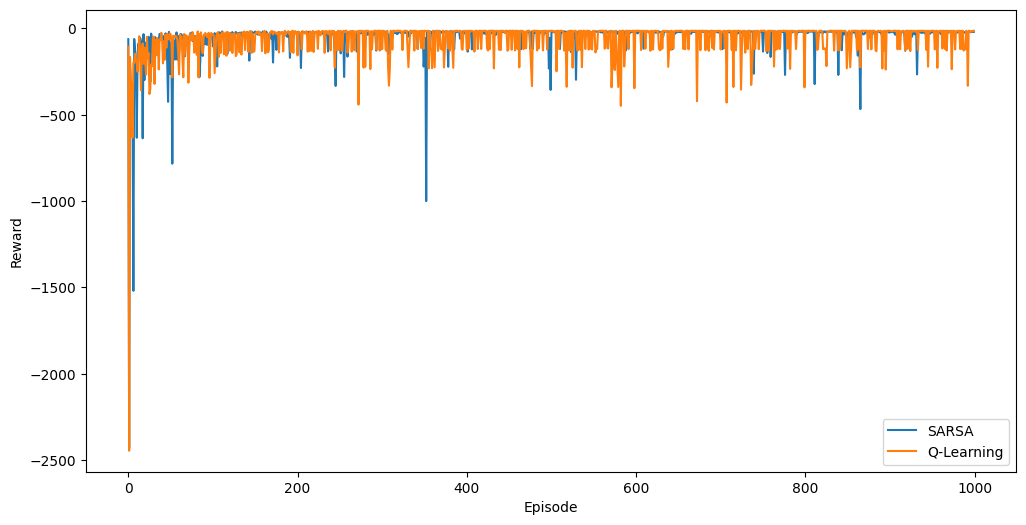

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards_sarsa, label='SARSA')
plt.plot(episode_rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

### 8. Análisis de resultados

a. Observe los resultados graficados y compare el rendimiento de SARSA y Q-Learning a lo largo de
los episodios.  

**Convergencia:**

Ambos algoritmos muestran una tendencia a mejorar su rendimiento con el tiempo, acercándose a valores de recompensa cercanos a cero a medida que avanza el número de episodios.

Sin embargo, parece que Q-Learning (en naranja) tiene una tasa de aprendizaje inicial más rápida que SARSA (en azul), ya que las recompensas negativas más grandes disminuyen más rápidamente en Q-Learning.


**Estabilidad:**

Q-Learning parece tener más fluctuaciones y picos negativos grandes en los episodios posteriores, lo que sugiere que es menos estable en comparación con SARSA. SARSA, aunque comienza con fluctuaciones más grandes, parece estabilizarse mejor después de un número significativo de episodios.


**Comparación General:**

Aunque Q-Learning muestra un mejor rendimiento inicial, SARSA parece ser más estable a largo plazo, con menos caídas pronunciadas en la recompensa. Q-Learning podría alcanzar un rendimiento alto más rápido, pero con mayor riesgo de fluctuaciones.




b. Considere cómo cada algoritmo equilibra la exploración y la explotación.

Como es un algoritmo "on-policy", SARSA tiende a ser más conservador en cuanto a las decisiones que toma. Debido a que el algoritmo sigue su política actual, la exploración es parte integral del proceso de aprendizaje, ya que la política puede elegir acciones no óptimas para equilibrar la exploración y la explotación. Esto puede resultar en una política que es menos propensa a caer en mínimos locales y muestra un comportamiento de aprendizaje más estable.

Al ser "off-policy", Q-Learning es más agresivo en cuanto a la explotación de lo que ya ha aprendido, tratando de maximizar la recompensa lo más rápido posible. Esto puede llevar a un aprendizaje más rápido en algunos casos, pero también puede resultar en menos estabilidad y más oscilaciones, como se puede observar en la gráfica.


#### Análisis de la Gráfica:
**SARSA:** La línea azul parece mostrar menos oscilaciones pronunciadas, lo cual es consistente con su enfoque más conservador y estable en la exploración y explotación.
**Q-Learning:** La línea naranja muestra más fluctuaciones, especialmente en las etapas iniciales del entrenamiento, lo que es típico de su naturaleza más agresiva en la explotación. Sin embargo, a medida que avanza el entrenamiento, ambas líneas tienden a converger a una política más óptima.

### 9. Preguntas

#### a. P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?  

**SARSA:** Durante las primeras etapas del entrenamiento (primeras 100-200 episodios), SARSA muestra menos variabilidad extrema en las recompensas. Aunque hay caídas, son menos frecuentes y más controladas en comparación con Q-Learning. A medida que se avanza en los episodios (después de 400 episodios), SARSA tiende a converger a políticas más estables y con recompensas menos fluctuantes. Aunque hay algunas caídas ocasionales, la tendencia general es hacia una estabilidad progresiva.


**Q-Learning:** Q-Learning, por otro lado, muestra más fluctuaciones y caídas abruptas en la recompensa, especialmente al inicio del entrenamiento. Esto es un indicativo de su enfoque más agresivo en la explotación.También se muestra una tendencia hacia la estabilización, pero las oscilaciones y caídas en la recompensa continúan siendo más frecuentes en comparación con SARSA, incluso en las etapas más avanzadas del entrenamiento.

#### b. P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?  

Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA debido a la forma en que cada algoritmo actualiza la función de valor Q y su enfoque sobre la política seguida durante el proceso de aprendizaje. Q-Learning actualiza su valor Q basado en la acción que maximiza la recompensa futura esperada, sin importar si esa acción es la que realmente se sigue en el episodio actual. Debido a que siempre actualiza su función Q en función de la mejor recompensa esperada, Q-Learning tiende a ser optimista sobre el potencial futuro de las decisiones que toma.


#### c. P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?  

#### d. P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?  

#### e. P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?  